<a href="https://colab.research.google.com/github/iramjaved/OptusUBuildingAI/blob/main/BankTestFull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Identify or Formulate the problem**


The Bank wanted based on the historical customer marketing dataset want to setup a prediction model to identify who would take term deposit. 




**Review AI Lit- ethics, algorithms and pretrained models**



 

**Data preparation and exploration**

Import libraries for data preparation and exploration


In [2]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Ex: import numpy library (as a given short name) / Here we import the entire library (called alias)
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# For Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


import pandas_profiling
# Explainability and visualisation libraries
from xgboost import plot_tree
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
# install shap explainability
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [67]:
#import data using.
df = pd.read_csv('/data/bank-additional-full.csv', sep=';')


In [33]:

pd.set_option('display.max_columns', None)
df.head(20)
#df.info()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
print(df.y.unique())
print(df['y'].value_counts(normalize=True))

['no' 'yes']
no     0.887346
yes    0.112654
Name: y, dtype: float64


**Since the output of the historical data shows 88% or the customers responded as 'no' this is an imbalanced problem**


In [27]:

print(df['nr.employed'].unique())
print(df['nr.employed'].value_counts(normalize=True))
print(df['emp.var.rate'].unique())
print(df['emp.var.rate'].value_counts(normalize=True))
print(df['cons.price.idx'].unique())
print(df['cons.price.idx'].value_counts(normalize=True))
print(df['cons.conf.idx'].unique())
print(df['cons.conf.idx'].value_counts(normalize=True))
print(df['euribor3m'].unique())
print(df['euribor3m'].value_counts(normalize=True))
print(df['pdays'].unique())
print(df['pdays'].value_counts(normalize=True))
print(df['y'].unique())
print(df['y'].value_counts(normalize=True))

[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]
5228.1    0.394144
5099.1    0.207196
5191.0    0.188477
5195.8    0.089419
5076.2    0.040376
5017.5    0.026003
4991.6    0.018768
5008.7    0.015781
4963.6    0.015417
5023.5    0.004176
5176.3    0.000243
Name: nr.employed, dtype: float64
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
 1.4    0.394144
-1.8    0.222978
 1.1    0.188477
-0.1    0.089419
-2.9    0.040376
-3.4    0.026003
-1.7    0.018768
-1.1    0.015417
-3.0    0.004176
-0.2    0.000243
Name: emp.var.rate, dtype: float64
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
93.994    0.188477
93.918    0.162305
92.893    0.140672
93.444    0.125643
94.465    0.106196
93.200    0.087793
93.075    0.059678
92.201    0.018695
92.963    0.017359
92.431    0.010853
92.649    0.008668
94.215    0.007551
94.199

**The column nr.employed column seems to be incorrect as this as per the problem seems to be individual data. and the number of employees have data values in range of approx 5000. This needs to be further investigated.**

   


In [28]:
print("Total no. of columns in the dataframe")
print(len(df.columns))
print("Columns with any null values")
print(df.isnull().any())

Total no. of columns in the dataframe
21
Columns with any null values
age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


**Out of all the columns there are no columns with null values**

In [29]:
print(df.contact.unique())
print(df.education.unique())
print(df.marital.unique())


['telephone' 'cellular']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['married' 'single' 'divorced' 'unknown']


In [30]:
print(df.poutcome.unique())
print(df['poutcome'].value_counts(normalize=True))

['nonexistent' 'failure' 'success']
nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64


**only 13% of the clients have been contacted earlier and their outputs recorded**

In [31]:
# Update output column to 0 and 1 to get the column in corrleation matrix

df['y'] = df['y'].map(lambda x: 1 if x == 'yes' else 0)

In [32]:


df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# New section

In [17]:
print(df['pdays'].value_counts().sort_index())
print(df['education'].value_counts(normalize=True))
df[['education','marital']].apply(pd.value_counts, normalize=True)


0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: pdays, dtype: int64
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64


,education,marital
basic.4y,0.101389,NaN
basic.6y,0.055647,NaN
basic.9y,0.146766,NaN
divorced,NaN,0.111974
high.school,0.231014,NaN
illiterate,0.000437,NaN
married,NaN,0.605225
professional.course,0.127294,NaN
single,NaN,0.280859
university.degree,0.295426,NaN


In [34]:
corr_matrix = df.corr()

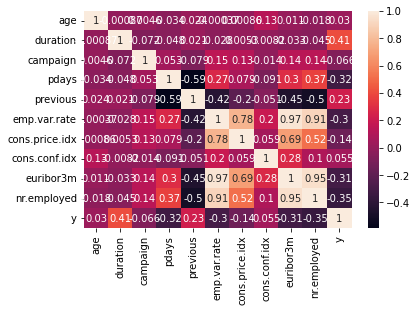

In [35]:
%matplotlib inline
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [37]:
corr_matrix['y'].sort_values(ascending=True)

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64

***Using the Correlation matrix we can see that 
y is meduim to high correlated to duration, pday, euribor3m and nremployed ***

In [68]:
#Prepare data for one hot encoding
df['education'] = 'education_' + df['education'].astype(str)
print(df.head())

   age        job  marital              education  default housing loan  \
0   56  housemaid  married     education_basic.4y       no      no   no   
1   57   services  married  education_high.school  unknown      no   no   
2   37   services  married  education_high.school       no     yes   no   
3   40     admin.  married     education_basic.6y       no      no   no   
4   56   services  married  education_high.school       no      no  yes   

     contact month day_of_week  duration  campaign  pdays  previous  \
0  telephone   may         mon       261         1    999         0   
1  telephone   may         mon       149         1    999         0   
2  telephone   may         mon       226         1    999         0   
3  telephone   may         mon       151         1    999         0   
4  telephone   may         mon       307         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994    

In [69]:
#one hot encoding 
one_hot_education=pd.get_dummies(df['education'])
print(one_hot_education)

       education_basic.4y  education_basic.6y  education_basic.9y  \
0                       1                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   1                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
41183                   0                   0                   0   
41184                   0                   0                   0   
41185                   0                   0                   0   
41186                   0                   0                   0   
41187                   0                   0                   0   

       education_high.school  education_illiterate  \
0                          0                     0   
1                          1                     0   
2        

In [70]:
#One hot encoding for rest of the string columns
df['marital'] = 'marital_' + df['marital'].astype(str)
df['job'] = 'job_' + df['job'].astype(str)
df['loan'] = 'loan_' + df['loan'].astype(str)
df['housing'] = 'housing_' + df['housing'].astype(str)
df['default'] = 'default_' + df['default'].astype(str)
df['contact'] = 'contact_' + df['contact'].astype(str)
df['day_of_week'] = 'day_of_week_' + df['day_of_week'].astype(str)
df['poutcome'] = 'poutcome_' + df['poutcome'].astype(str)

print(df.head())

   age            job          marital              education  \
0   56  job_housemaid  marital_married     education_basic.4y   
1   57   job_services  marital_married  education_high.school   
2   37   job_services  marital_married  education_high.school   
3   40     job_admin.  marital_married     education_basic.6y   
4   56   job_services  marital_married  education_high.school   

           default      housing      loan            contact month  \
0       default_no   housing_no   loan_no  contact_telephone   may   
1  default_unknown   housing_no   loan_no  contact_telephone   may   
2       default_no  housing_yes   loan_no  contact_telephone   may   
3       default_no   housing_no   loan_no  contact_telephone   may   
4       default_no   housing_no  loan_yes  contact_telephone   may   

       day_of_week  duration  campaign  pdays  previous              poutcome  \
0  day_of_week_mon       261         1    999         0  poutcome_nonexistent   
1  day_of_week_mon       1

In [71]:
one_hot_marital=pd.get_dummies(df['marital'])
one_hot_job=pd.get_dummies(df['job'])
one_hot_loan=pd.get_dummies(df['loan'])
one_hot_housing=pd.get_dummies(df['housing'])
one_hot_default=pd.get_dummies(df['default'])
one_hot_contact=pd.get_dummies(df['contact'])
one_hot_day_of_week=pd.get_dummies(df['day_of_week'])
one_hot_poutcome=pd.get_dummies(df['poutcome'])
print(one_hot_marital)

       marital_divorced  marital_married  marital_single  marital_unknown
0                     0                1               0                0
1                     0                1               0                0
2                     0                1               0                0
3                     0                1               0                0
4                     0                1               0                0
...                 ...              ...             ...              ...
41183                 0                1               0                0
41184                 0                1               0                0
41185                 0                1               0                0
41186                 0                1               0                0
41187                 0                1               0                0

[41188 rows x 4 columns]


In [72]:
df=df.join(one_hot_education)
df=df.join(one_hot_marital)
df=df.join(one_hot_job)
df=df.join(one_hot_loan)
df=df.join(one_hot_housing)
df=df.join(one_hot_default)
df=df.join(one_hot_contact)
df=df.join(one_hot_day_of_week)
df=df.join(one_hot_poutcome)

In [73]:
# check all the  columns before removing the base columns
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,marital_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_unknown,loan_yes,housing_no,housing_unknown,housing_yes,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,job_housemaid,marital_married,education_basic.4y,default_no,housing_no,loan_no,contact_telephone,may,day_of_week_mon,261,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1,57,job_services,marital_married,education_high.school,default_unknown,housing_no,loan_no,contact_telephone,may,day_of_week_mon,149,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,37,job_services,marital_married,education_high.school,default_no,housing_yes,loan_no,contact_telephone,may,day_of_week_mon,226,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
3,40,job_admin.,marital_married,education_basic.6y,default_no,housing_no,loan_no,contact_telephone,may,day_of_week_mon,151,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,56,job_services,marital_married,education_high.school,default_no,housing_no,loan_yes,contact_telephone,may,day_of_week_mon,307,1,999,0,poutcome_nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [74]:
#Remove the encoded base columns
df = df.drop(columns=['marital','education','job','housing','loan','default','contact','month','poutcome','day_of_week'])
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,marital_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_unknown,loan_yes,housing_no,housing_unknown,housing_yes,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [75]:
df['y'] = df['y'].apply(lambda x: 0 if x.strip()=='no' else 1)

In [76]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,marital_divorced,marital_married,marital_single,marital_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_unknown,loan_yes,housing_no,housing_unknown,housing_yes,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [77]:
#Delete one column from each of the variable combination to remove data redundancy
df = df.drop(columns=['education_unknown','marital_single','job_unknown','housing_yes','loan_yes','default_yes','contact_cellular','poutcome_nonexistent'])
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_divorced,marital_married,marital_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan_no,loan_unknown,housing_no,housing_unknown,default_no,default_unknown,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0


In [78]:
# Here we use a different function (from the numpy library) to randomly split the dataset into test/training/validation 
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
print (train.shape, test.shape, validate.shape)
# (8999, 20) (3000, 20) (3000, 20)

(24712, 46) (8238, 46) (8238, 46)


In [79]:
X_train = train.drop(columns=['y'])
y_train = train[['y']]

X_test = test.drop(columns=['y'])
y_test = test[['y']]

X_validate = validate.drop(columns=['y'])
y_validate = validate[['y']]

X_train.head()
y_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_divorced,marital_married,marital_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan_no,loan_unknown,housing_no,housing_unknown,default_no,default_unknown,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
6847,42,456,2,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0
38386,21,328,1,999,0,-3.4,92.431,-26.9,0.739,5017.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
21484,32,80,3,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
8310,45,825,1,999,0,1.4,94.465,-41.8,4.864,5228.1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
18079,34,183,1,999,0,1.4,93.918,-42.7,4.963,5228.1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0


,y
6847,0
38386,1
21484,0
8310,0
18079,0


In [80]:
y_train.head()

,y
6847,0
38386,1
21484,0
8310,0
18079,0


In [81]:
#Logistic regression 
hrLogReg = LogisticRegression()
#fit the model on the training data
hrLogReg.fit(X_train, y_train)

LogisticRegression()

In [82]:
#Decision tree 
hrDecisionTree = tree.DecisionTreeClassifier()
hrDecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
# K-nearest neighbour 
hrKNN = neighbors.KNeighborsClassifier()
hrKNN.fit(X_train,y_train)

KNeighborsClassifier()

In [84]:
# XGBoost 
hrXGB = xgb.XGBClassifier()
hrXGB.fit(X_train,y_train)

XGBClassifier()

In [85]:
# Neural network - Multi-layer Perceptron
hrMLP = MLPClassifier()
hrMLP.fit(X_train,y_train)

MLPClassifier()

In [86]:
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 1]
y_prob
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 0]
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

array([1., 1., 1., ..., 1., 1., 1.])

In [87]:
# DS: for clarity show without a loop
classifiers = [ hrMLP, hrXGB, hrKNN, hrDecisionTree, hrLogReg]
evalTable = PrettyTable(['Name', 'Accuracy', 'F1-score', 'ROC AUC score', 'AP score'])
for i in classifiers:
  # Predict the class
  y_predict = i.predict(X_test)
  # Predict probabilities and retrieve just the probabilities for the positive class
  y_prob = i.predict_proba(X_test)[:, 1]
  evalTable.add_row( [ type(i).__name__, (round(i.score(X_test, y_test),3)), 
                      (round(metrics.f1_score(y_test, y_predict),3)), 
                      (round(metrics.roc_auc_score(y_test, y_prob),3)), 
                      (round(metrics.average_precision_score(y_test, y_prob),3)),] )

print(evalTable)

+------------------------+----------+----------+---------------+----------+
|          Name          | Accuracy | F1-score | ROC AUC score | AP score |
+------------------------+----------+----------+---------------+----------+
|     MLPClassifier      |   0.91   |  0.479   |     0.935     |  0.616   |
|     XGBClassifier      |  0.918   |  0.582   |     0.951     |  0.681   |
|  KNeighborsClassifier  |  0.908   |  0.542   |     0.875     |  0.512   |
| DecisionTreeClassifier |  0.889   |  0.512   |     0.725     |  0.318   |
|   LogisticRegression   |  0.911   |  0.506   |     0.929     |  0.585   |
+------------------------+----------+----------+---------------+----------+


In [98]:
#classification report
y_predict = hrLogReg.predict(X_test)
classreport = metrics.classification_report(y_test,y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7301
           1       0.68      0.40      0.51       937

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [97]:
y_predict = hrXGB.predict(X_test)
classreport = metrics.classification_report(y_test,y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7301
           1       0.69      0.50      0.58       937

    accuracy                           0.92      8238
   macro avg       0.82      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [99]:
#confusion matrix 
confMat = metrics.confusion_matrix(y_test,y_predict)
print(confMat)



[[7126  175]
 [ 560  377]]


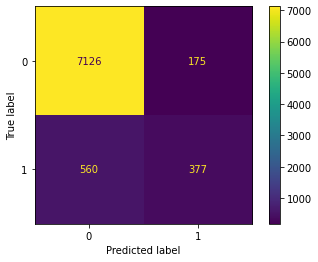

In [100]:
#a more visual confusion matrix
metrics.plot_confusion_matrix(hrLogReg, X_test, y_test, values_format='.0f')

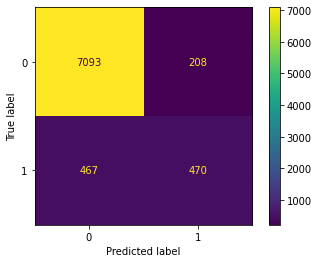

In [101]:
#a more visual confusion matrix
metrics.plot_confusion_matrix(hrXGB, X_test, y_test, values_format='.0f')

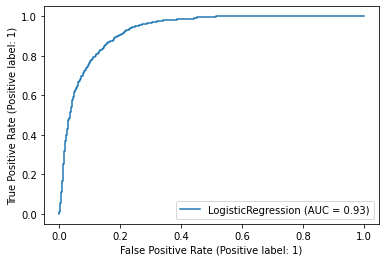

In [91]:
# A single ROC curve
metrics.plot_roc_curve(hrLogReg, X_test, y_test)

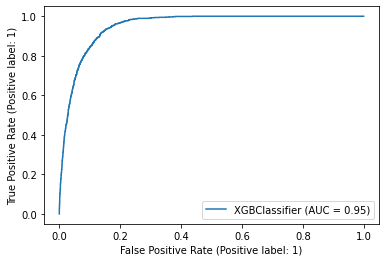

In [102]:
# A single ROC curve
metrics.plot_roc_curve(hrXGB, X_test, y_test)

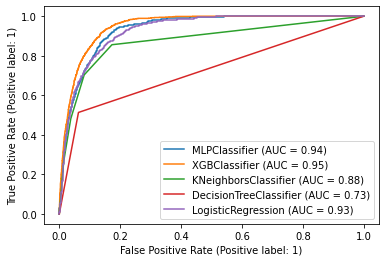

In [92]:
# All ROC curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, X_test, y_test, ax=all_axes)

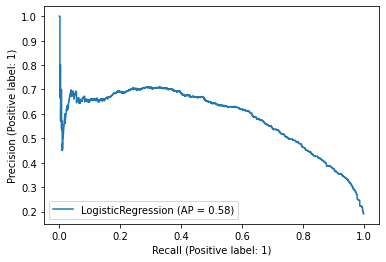

In [93]:
# A single precision-recall curve
metrics.plot_precision_recall_curve(hrLogReg, X_test, y_test)

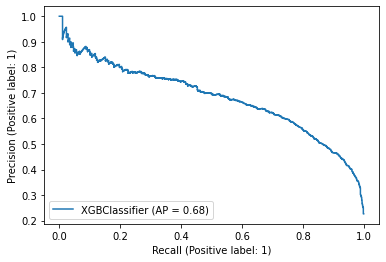

In [103]:
# A single precision-recall curve
metrics.plot_precision_recall_curve(hrXGB, X_test, y_test)

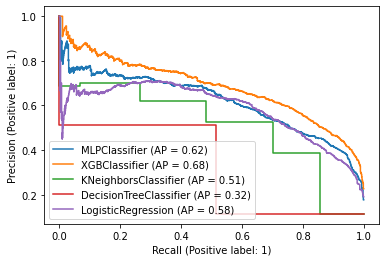

In [104]:
# All precision-recall curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_precision_recall_curve(i, X_test, y_test, ax=all_axes)

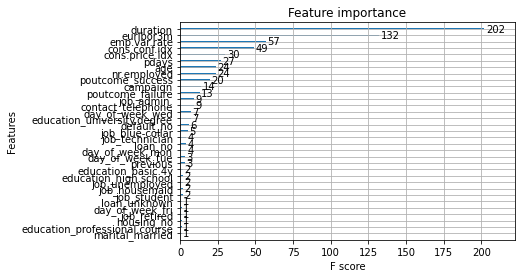

In [95]:
# Built-in function in XGBoost library for input variable (input feature) importance
xgb.plot_importance(hrXGB)

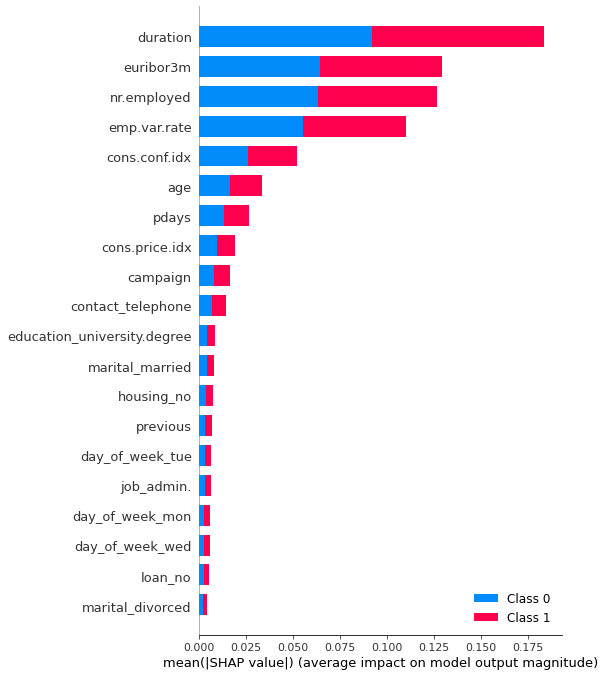

In [96]:
import shap
# Using a SHAP explainer - works for tree-based models only
shapExplainer = shap.TreeExplainer(hrDecisionTree) 
shapExplainer_values = shapExplainer.shap_values(X_train)
shap.summary_plot(shapExplainer_values, X_train)

In [ ]:
#sns.pairplot(df)